In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder


# 0. Idée de manoeuvre pré-majoration

Y a eu un kaggle sur le sujet, on va donc s'en inspirer. (ce n'est pas le même dataset)
Voici le lien du kaggle: https://www.kaggle.com/c/home-credit-default-risk/overview

Voici un notebook introductif: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

Voici un notebook avec un bon score: https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

J'ai bien envie de combiner un neural network et un XGBoost, en général c'est bénèf. 

# 1. Exploration of the data

In [55]:
data = pd.read_csv('data/CreditTraining.csv')
data.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


In [60]:
data

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
5,3858,0,Existing Client,04/03/1983,15/09/2011,NP_Client,University,Married,0.0,28,60,2.0,C,04/10/2011,Sales,Old rent,1,NaN,C
6,2189,0,Non Existing Client,25/09/1979,17/07/2011,NP_Client,University,Married,0.0,10,36,1.0,C,28/07/2011,Sales,Owned,1,NaN,B
7,9338,0,Non Existing Client,04/10/1953,11/04/2012,NP_Client,University,Married,0.0,15,36,1.0,C,12/04/2012,Sales,Owned,1,16/04/2013,B
8,9578,0,Existing Client,01/03/1974,20/02/2001,NP_Client,University,Single,0.0,0,500,3.0,P,02/04/2012,Branch,Owned,1,NaN,E
9,173,1,Existing Client,13/02/1963,27/04/2011,NP_Client,University,Married,4.0,35,"87,6",2.0,C,03/05/2011,Sales,Owned,1,18/11/2012,L


In [52]:
data['Net_Annual_Income']

pandas.core.series.Series

On a un problème avec Net_Annual_Income qui est pas enregistré en float, ce qui est pas très pratique. Le problème c'est que pour l'enregistrer en float il faut changer les ',' en '.'.

In [64]:
data['Net_Annual_Income'] = data['Net_Annual_Income'].str.replace(',', '.').astype(float)

In [65]:
data.astype({'Net_Annual_Income': 'float64'}).dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
dtype: object

In [66]:
data.dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
dtype: object

On trace des histogrammes pour les variables continues, voir si on observe quelque chose, peut-être des outliers...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21589630>]],
      dtype=object)

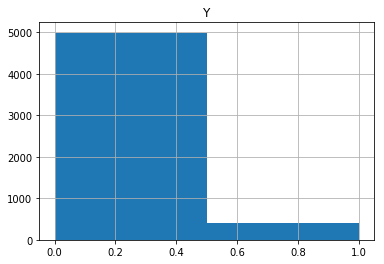

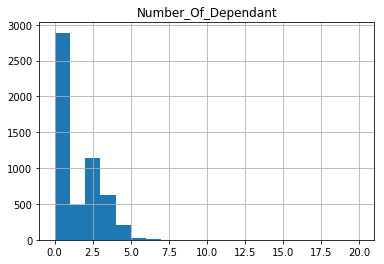

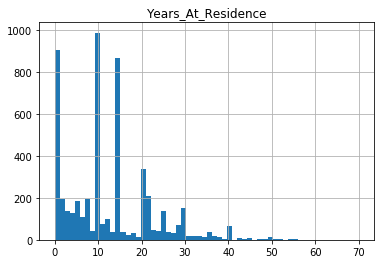

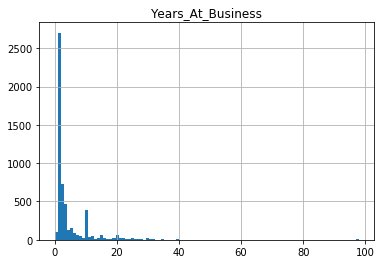

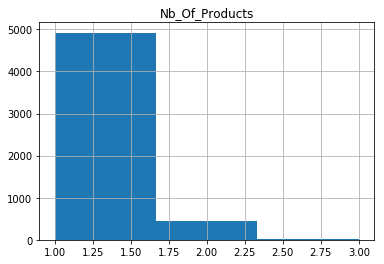

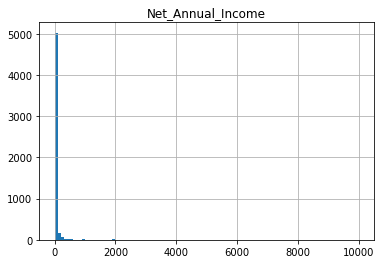

In [67]:
data.hist(column = 'Y', bins = 2)
data.hist(column = 'Number_Of_Dependant', bins = 20)
data.hist(column = 'Years_At_Residence', bins = 60)
data.hist(column = 'Years_At_Business', bins = 100)
data.hist(column = 'Nb_Of_Products', bins = 3)
data.hist(column = 'Net_Annual_Income',bins = 100)

Intéressant de remarquer que pour la catégorie 'Years_At_Residence' on a des gros regroupements autour de 10,20 et 30, comme si on avait une grosse partie de gens qui arrondissaient sur ces valeurs là, peut-être que ca induit un certain biais.

In [71]:
print(data['Customer_Type'].value_counts())
print(data['P_Client'].value_counts())
print(data['Educational_Level'].value_counts())
print(data['Marital_Status'].value_counts())
print(data['Prod_Sub_Category'].value_counts())
print(data['Source'].value_counts())
print(data['Type_Of_Residence'].value_counts())
print(data['Prod_Category'].value_counts())

Non Existing Client    3369
Existing Client        2011
Name: Customer_Type, dtype: int64
NP_Client    4968
P_Client      412
Name: P_Client, dtype: int64
University           4785
Master/PhD            522
Diploma                58
Secondary or Less      15
Name: Educational_Level, dtype: int64
Married      4206
Single       1046
Widowed        64
Divorced       63
Separated       1
Name: Marital_Status, dtype: int64
C    4638
G     624
P     118
Name: Prod_Sub_Category, dtype: int64
Sales     4119
Branch    1261
Name: Source, dtype: int64
Owned       4791
Old rent     323
Parents      179
New rent      83
Company        4
Name: Type_Of_Residence, dtype: int64
B    3176
D     670
C     517
K     265
L     236
G     188
E     101
H      79
J      71
M      49
A      19
F       5
I       4
Name: Prod_Category, dtype: int64


On regarde aussi une description de tout ce qu'on a en variables categorielles (sauf les dates) pour voir la répartition de ce qu'on a.

# 2. Data transformation 

# 3. Data split 

# 4. Comparison of different models 

# 5. Tuning of the model 

# 6. Conclusion 